## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count = combined_data['Mouse ID'].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
[mice_id for mice_id in duplicate_mice_id]

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice_id)]
clean_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_mice_data['Mouse ID'].nunique()
new_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_mice_data_mean = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
clean_mice_data_median = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
clean_mice_data_variance = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
clean_mice_data_std = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
clean_mice_data_sem = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

clean_summary_df = pd.DataFrame({
    'Tumor Vol. Mean': clean_mice_data_mean, 'Tumor Vol. Median': clean_mice_data_median, 'Tumor Vol. Variance': clean_mice_data_variance, 'Tumor Vol. Std. Dev.': clean_mice_data_std, 'Tumor Vol. SEM': clean_mice_data_sem
})
    
clean_summary_df

,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Std. Dev.,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mice_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

C:\Users\lordi\AppData\Local\Temp\ipykernel_14464\3085009438.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  clean_mice_data.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

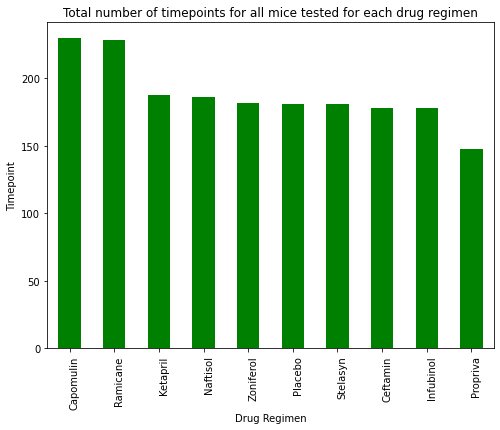

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_data = clean_mice_data.groupby('Drug Regimen')['Timepoint'].count()
timepoint_data.sort_values(ascending=False, inplace=True)
bar_plot = timepoint_data.plot(kind='bar', facecolor='green', figsize=(8,6), title="Total number of timepoints for all mice tested for each drug regimen",
 xlabel="Drug Regimen", ylabel="Timepoint")

xticklabels = timepoint_data.index
bar_plot.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

plt.show()

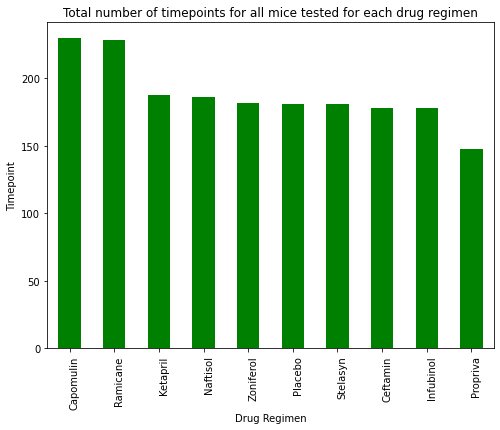

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_data = clean_mice_data.groupby('Drug Regimen')['Timepoint'].count()
timepoint_data.sort_values(ascending=False, inplace=True)
bar_plot = timepoint_data.plot(kind='bar', facecolor='green', figsize=(8,6), title="Total number of timepoints for all mice tested for each drug regimen",
 xlabel="Drug Regimen", ylabel="Timepoint")

xticklabels = timepoint_data.index
bar_plot.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)

plt.show()

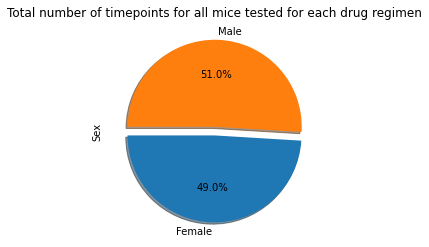

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = clean_mice_data.groupby('Sex')['Mouse ID'].count()

pie_plot = male_female.plot(kind='pie', autopct="%1.1f%%", explode=[0.05, 0.05], shadow=True, startangle=180,  
                            title='Total number of timepoints for all mice tested for each drug regimen',
                            ylabel='Sex')

plt.show()

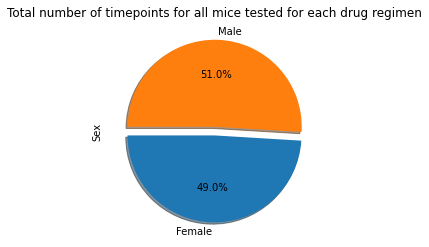

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_female = clean_mice_data.groupby('Sex')['Mouse ID'].count()

pie_plot = male_female.plot(kind='pie', autopct="%1.1f%%", explode=[0.05, 0.05], shadow=True, startangle=180,  
                            title='Total number of timepoints for all mice tested for each drug regimen',
                            ylabel='Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
groupby_regiment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 

## Use a for loop to dynamically work on regimens
for treatment in groupby_regiment:
    tumor_volume = clean_mice_data.loc[clean_mice_data["Drug Regimen"] == treatment,:]
    tumor_volume = tumor_volume.groupby('Mouse ID').Timepoint.max()
    tumor_volume_merge = pd.merge(tumor_volume, clean_mice_data, how="left", on=("Mouse ID", "Timepoint"))
    tumor_volume_merge = tumor_volume_merge['Tumor Volume (mm3)']

    tumor_vol_list.append(tumor_volume_merge)

    quartiles = tumor_volume_merge.quantile([0.25,0.50,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f'-----{treatment}-----')
    
    print(f'The lower quartile of {treatment} Tumor Volume in (mm3) is {lowerq}')
    print(f'The upper quartile of {treatment} Tumor Volume in (mm3) is {upperq}')
    print(f'The interquartile range of {treatment} Tumor Volume in (mm3) is {iqr}')
    print(f'The median of {treatment} Tumor Volume in (mm3) is {quartiles[0.5]}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    print(f'{treatment} Values below {lower_bound} could be outliers')
    print(f'{treatment} Values above {upper_bound} could be outliers\n')

-----Capomulin-----
The lower quartile of Capomulin Tumor Volume in (mm3) is 32.37735684
The upper quartile of Capomulin Tumor Volume in (mm3) is 40.1592203
The interquartile range of Capomulin Tumor Volume in (mm3) is 7.781863460000004
The median of Capomulin Tumor Volume in (mm3) is 38.1251644
Capomulin Values below 20.70456164999999 could be outliers
Capomulin Values above 51.83201549 could be outliers

-----Ramicane-----
The lower quartile of Ramicane Tumor Volume in (mm3) is 31.56046955
The upper quartile of Ramicane Tumor Volume in (mm3) is 40.65900627
The interquartile range of Ramicane Tumor Volume in (mm3) is 9.098536719999998
The median of Ramicane Tumor Volume in (mm3) is 36.56165229
Ramicane Values below 17.912664470000003 could be outliers
Ramicane Values above 54.30681135 could be outliers

-----Infubinol-----
The lower quartile of Infubinol Tumor Volume in (mm3) is 54.04860769
The upper quartile of Infubinol Tumor Volume in (mm3) is 65.52574285
The interquartile range of

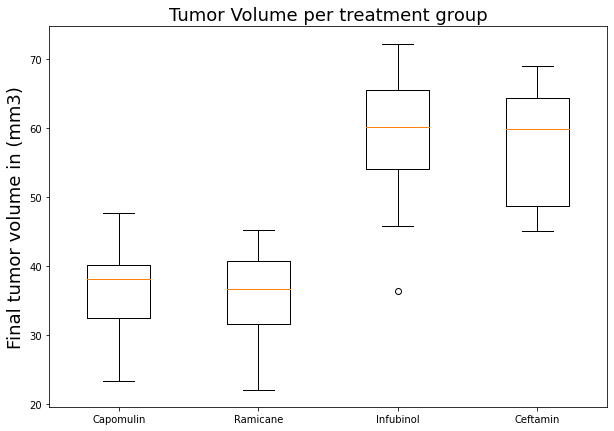

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_title('Tumor Volume per treatment group', fontsize =18)
ax1.set_ylabel('Final tumor volume in (mm3)', fontsize =18)
ax1.boxplot(tumor_vol_list, labels=groupby_regiment)
plt.show()

## Line and Scatter Plots

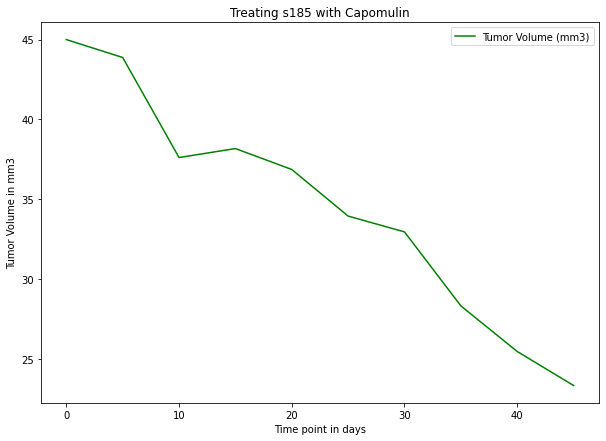

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
## Device values to use later
treatment_for_plot = 'Capomulin'
mouse = 's185'

## get all necessary data for Capomulin
capomulin_treatment_data = clean_mice_data.loc[clean_mice_data['Drug Regimen']==treatment_for_plot]

capomulin_tumor_vol_time = capomulin_treatment_data.loc[clean_mice_data['Mouse ID'] == mouse, ['Timepoint', 'Tumor Volume (mm3)']].set_index('Timepoint')
capomulin_tumor_vol_time.plot(color='green', figsize=(10, 7))
plt.title(f"Treating {mouse} with {treatment_for_plot}")
plt.xlabel("Time point in days")
plt.ylabel("Tumor Volume in mm3")
plt.show()

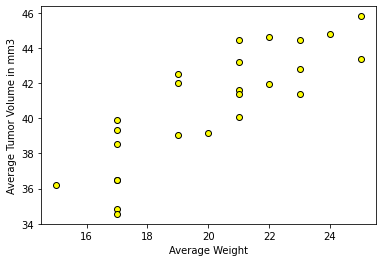

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_ave_tumor_vol = capomulin_treatment_data.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
capomulin_ave_weight = capomulin_treatment_data.groupby(['Mouse ID'])['Weight (g)'].mean()

capomulin_ave_vol_weight = pd.merge(capomulin_ave_tumor_vol, capomulin_ave_weight, how='left', on='Mouse ID')

plt.scatter(capomulin_ave_vol_weight['Weight (g)'], capomulin_ave_vol_weight['Tumor Volume (mm3)'],  marker='o', facecolors='yellow', edgecolors='black')
plt.xlabel('Average Weight')
plt.ylabel('Average Tumor Volume in mm3')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is 0.7088568047708723


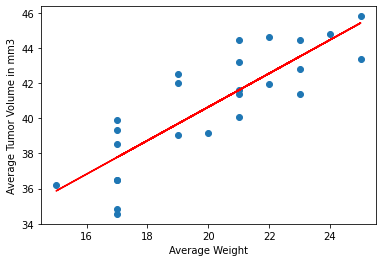

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_ave_weight
y_values = capomulin_ave_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Average Weight')
plt.ylabel('Average Tumor Volume in mm3')

correlation = st.pearsonr(x_values, y_values)

print(f'The correlation between both factors is {round(correlation[0],2)}')
print(f'The r-squared is {rvalue**2}')

plt.show()